<b> Implementation of RNN for Stock Price Prediction</b>

In this notebook, we implement a simple LSTM-based neural network that will be used to predict the Stock Price of a company.

We will be using Keras NN libraryh to implement the LSTM, pandas framework to read the dataset, numpy to do some data manipulation, and matplotlib to plot the prediction.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Lets use pandas library to read the csv file. The column that we want to use as our data is in the first column, so we use that particular column as our training data.

In [2]:
# Importing the training set
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:,1:2].values
print(training_set.shape)

(1258, 1)


<b> Feature Scaling </b>

We can either use Standardisation (X_stand = (x - mean(x))/(standard deviation(x))

or Normalization (x_norm = (x - min(x))/(max(x) - min(x))


We would like to normalize the stock price for easier processing. We use MinMax Normalization provided by sklearn. The normalization will transform the original stock price into a value in the range (0,1). We can later get back the actual value by inverse transformation.

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

As we are predicting the next day stock price based on the previous day's stock price, we use the price at time t as the training data and the price at time t+1 as the label for the price at time t.
We split our training data in a way that every price (except the first one) has the succeeding price as its label.

In [4]:
# Getting the inputs and the ouputs
X_train = training_set[0:1257]
y_train = training_set[1:1258]

<b> Reshaping </b>

We will be adding one dimension for the timestamp, so we are going to create the 3-D dataset from the 2-D training set.
Also from the Keras library, we can see that the first dimension is the no. of batches (no. of instances), second dimension is the time interval (which is 1 day in our case, so this value is 1), and the third dimension is the no. of input features (as we have only one feature, i.e. the stock price, this is also 1 in our case).

As we have 1257 observations, this will be our first dimension, the time is 1 day, so the second dimension is 1, and the number of features is 1, so the third dimension is 1.

In [5]:
# Reshaping
X_train = np.reshape(X_train, (1257, 1, 1))

<b> Library Imports</b>

We use Keras library for our network. The Sequential class is for the RNN, the Dense class is for the output layer, and the LSTM class is for LSTM network that we are going to use.

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


As we are going to predict a continuous value, this is a kind of regression task. We just name the object "regressor" for the sake of making it relevance to the task.

In [7]:
# Initialising the RNN
regressor = Sequential()

We add the LSTM layer to our network. The activation function is 'sigmoid' in this case because it was found to give better result rather than the 'tanh'. The input_shape indicates the features that we wanna feed to our network. As we have only one feature, the input_shape is (None, 1), where 'None' indicates we are open to accept any timestamp value, and 1 indicates we are dealing with one feature.

In [8]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

<b> Output Layer </b>

We add our basic output layer. This can be simply achieved by adding the Dense class in our regressor object. The dimension of output layer is 1 because we just predict the stock price which is a single value.

In [9]:
# Adding the output layer
regressor.add(Dense(units = 1))

<b> Compiling network </b>

As the rmsporp optimizer takes more memory, we select adam optimizer here. As we are doing regression instead of classification, we use the mean_squared_error as our loss function.

In [10]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

<b> Fitting the data to model </b>

In [11]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 2s - loss: 0.7290     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.5731     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.4476     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.3482     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.2705     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.2106     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.1652     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.1314     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.1063     - ETA: 0s - loss: 0.10
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0885     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0760     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0673     
Epoch 13/200
12

1257/1257 [==============================] - 0s - loss: 2.4847e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.5000e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.4812e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.5038e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.4818e-04     


<b> Predictions </b>

Now we are goinng to predict the stock price and compare with what we have in our test set.

In [12]:
# Getting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values
print(real_stock_price.shape)

(20, 1)


In [13]:
#transform the test data to the scale similar to the train data
inputs = real_stock_price
inputs = sc.transform(inputs)
#reshape as we did in the train data, we have 20 observations, 1 feature and for 1 time
inputs = np.reshape(inputs, (20, 1, 1))
# Getting the predicted stock price of 2017
predicted_stock_price = regressor.predict(inputs)

<b> Inverse transforming the prediction </b>

The predicted value is in normalized form, so we do inverse transform to get the real stock value the model predicted.

In [14]:
#now get the real value, as the predicted _stock_price will have the normalized values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [15]:
#lets see the predicted prices
print(predicted_stock_price)

[[ 777.05096436]
 [ 785.75115967]
 [ 783.67541504]
 [ 792.02832031]
 [ 798.63140869]
 [ 799.28759766]
 [ 798.00183105]
 [ 798.96411133]
 [ 799.11688232]
 [ 798.93707275]
 [ 798.3661499 ]
 [ 798.05578613]
 [ 798.86065674]
 [ 799.01348877]
 [ 805.75097656]
 [ 809.00964355]
 [ 812.64178467]
 [ 811.26873779]
 [ 802.3371582 ]
 [ 793.48278809]]


<b> Visualization of predicted result </b>

We are going to visualize the predicted result and see the difference between the actual stock price and the predicted stock price.

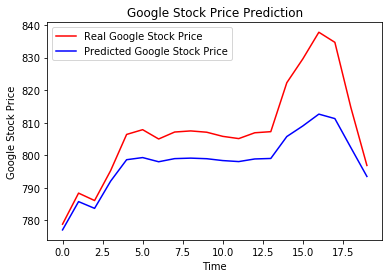

In [16]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

To summarize, the model took the price of one day and predicted the price of next day.
It then took the real price of another day and then predicted the price of the
following day. This process was repeated.
The prediction was made for a single time period and the model may not give
good result if we want to predict the stock price for the whole month, given
the stock price for the first day of the month.

<b> Summary </b>

<ul>
 <li> The reason our predictions are very similar to the inputs is because the network is only learning that the 
prediction(t) = k * input(t-1), with k a small constant. Therefore it is not relevant.

<li> The whole reason why it is not relevant is in the timestep. With our timestep = 1, we train the network by inputing x(t) and learning x(t+1). So what happens is that the states of the hidden layer are reset, after which we input x(t+1) and learn x(t+2), and so on. Hence, since the states are reset after each time t, the network is not learning anything useful, because it is only taking into account the value we are inputting.

<li> Therefore, to fix this and improve our model, we need to increase the timestep. And that's exactly what we'll do in the next section: Evaluating, Improving and Tuning the RNN.

<li> Extra clarification: the article displayed in the lectures is indeed from Stanford, but it is created by undergraduate students of the CS229 course. The students of that course submitted a final project for evaluation; it was just put online but it is not published anywhere. There is a big difference between reading a Stanford paper published online and reading an assignment written by a group of undergrads.
</ul>

<b> Next Steps </b>
<ol> 
<li> First, a little Homework just to practice what we have just seen. Only the choice of timestep = 1 is not relevant, the rest is correct so you can already practice with the code to do this first Homework.

<li> Then, you will learn how to evaluate a RNN model, and more generally, a Regression model (a model that predicts a continuous outcome).

<li> And eventually the most important and final step: we will improve our RNN model, correcting this one timestep defect, by adding more timesteps. We will also consider improving the model by adding more LSTM layers. You will first try to do this final step on your own, this will be the big Homework Challenge of this Part. Good luck with this one.

<b> HomeWork Challenge </b>

<ol>
<li> Get the real Google Stock Price from 2012 to 2016.
<li> Apply the RNN model to predict the Google Stock Price for that same period.
<li> Using matplotlib, plot your results on a same chart.
</ol>


In [17]:
#We already have the real stock price in X_train, so we use it
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values


# Getting the predicted stock price of 2017
predicted_stock_price_train = regressor.predict(X_train)
#now get the real value, as the predicted _stock_price will have the normalized values
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

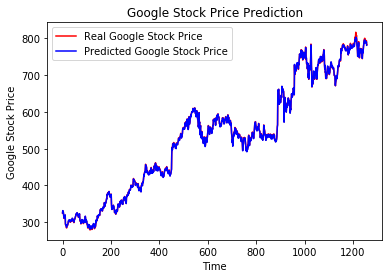

In [18]:
#visualize the predicted vs real values
plt.plot(real_stock_price_train, color ='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color='blue', label ='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [19]:
print(real_stock_price_train)
print(len(real_stock_price_train))

[[ 325.25]
 [ 331.27]
 [ 329.83]
 ..., 
 [ 793.7 ]
 [ 783.33]
 [ 782.75]]
1258


<b> Evaluating Performance </b>


We use RMSE (root mean squared error) to evaluate our model. This evaluation metric is generally useful for regression models.

In [25]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print("rmse is:",rmse)

rmse is: 11.607808832472823


In [26]:
#Lets find the percentage of error of the model. This can be
# done by dividing the rmse by the average value of the stock price
performance = rmse/np.mean(real_stock_price)
print ("% Performance is:", performance)
print (np.mean(real_stock_price))

% Performance is: 0.0143745326249
807.526


Improving and Tuning the RNN - Homework Challenge
Section 17, Lecture 84
Improving and Tuning the RNN - Homework Challenge
As we saw in the previous section, the issue of our previous RNN model was in the one unit timestep. Because the timestep was 1, the model didn't learn anything useful, because it only took into account the input stock price at time t. Therefore, the model needs more past info to look back when predicting the stock price at time t+1. So instead of only looking at the stock price at time t, we want for example our model to look back at the stock prices at times t-20, t-19, ..., and t-1. In that last example the timestep is 20. And we still predict the stock price for the next day, that is here the stock price at time t. 

Therefore the challenge now is to improve the model by increasing the timestep.

Besides we will also try to improve our model by adding more LSTM layers.

Hence, here are the Homework Instructions:

Make four models:

<ol>
<li> Model 1 - 20 timesteps & 1 LSTM layer
<li> Model 2 - 20 timesteps & 4 LSTM layers
<li> Model 3 - 60 timesteps & 1 LSTM layer
<li> Model 4 - 60 timesteps & 4 STM layers

</ol>
Plot your results (real stock price and predicted stock price of January 2017) on a same chart.

Optional: you can do some Parameter Tuning on these four models. Parameter Tuning for Regression is the same as Parameter Tuning for Classification which you learned in Part 1 - Artificial Neural Networks, only here for Regression you have to replace scoring = 'accuracy'  by scoring = 'mse' in the GridSearchCV class parameters.

And eventually, feel free to create another architecture of the RNN model or even take a whole new approach of the problem if you think there is a better one, we'd be very happy to see your results in the Q&A.


<b> Model 1 - 20 timesteps & 1 LSTM layer</b> 

In [45]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def performMultipleTimeStepSingleLSTM(time_step):

    # Importing the training set
    training_set = pd.read_csv('Google_Stock_Price_Train.csv')
    training_set = training_set.iloc[:,1:2].values
    # Feature Scaling
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler()
    training_set_scaled = sc.fit_transform(training_set)

    X_train = []
    y_train = []
    # the X_train contains the data for previous 20 time steps (20 days)
    # the y_train contains the data for the label/data for the 21 time step
    for i in range(time_step, len(training_set_scaled)):
        #take the 20 time steps data as the training data
        # the second zero is to take the first dimension
        X_train.append(training_set_scaled[i-time_step:i, 0])
        # take the 21st time step data as the label
        y_train.append(training_set_scaled[i, 0])

    #now lets create a numpy array of the training data and the label
    X_train, y_train = np.array(X_train), np.array(y_train)

    #lets reshape the data to 3-D which is required by the model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Importing the Keras libraries and packages
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM

    # Initialising the RNN
    regressor = Sequential()

    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

    # Making the predictions and visualising the results

    # Getting the real stock price of 2017
    test_set = pd.read_csv('Google_Stock_Price_Test.csv')
    test_set = test_set.iloc[:,1:2].values

    #we convert the test data into the 20 time step format as X_train

    #lets concatenate the training set and test set to get the 20 time span data
    real_stock_price = np.concatenate((training_set[0:len(training_set)], test_set), axis = 0)

    #scaling the data
    real_stock_price_scaled = sc.transform(real_stock_price)

    inputs = []
    #the range is adjusted so that the time_step number of entries are included in the inputs
    for i in range(len(training_set) - time_step , len(training_set)):
        inputs.append(real_stock_price_scaled[i-time_step:i, 0])


    inputs = np.array(inputs)
    
    print(inputs.shape)
    
    inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))


    predicted_stock_price = regressor.predict(inputs)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    return real_stock_price, predicted_stock_price


We simply call above method for the Model1 and Model 3.

In [46]:

real_stock_price_20, predicted_stock_price_20 = performMultipleTimeStepSingleLSTM(time_step = 20)

Epoch 1/100
1238/1238 [==============================] - 2s - loss: 0.5014     
Epoch 2/100
1238/1238 [==============================] - 0s - loss: 0.3298     
Epoch 3/100
1238/1238 [==============================] - 0s - loss: 0.2039     
Epoch 4/100
1238/1238 [==============================] - 0s - loss: 0.1189     
Epoch 5/100
1238/1238 [==============================] - 0s - loss: 0.0722     
Epoch 6/100
1238/1238 [==============================] - 0s - loss: 0.0547     
Epoch 7/100
1238/1238 [==============================] - 0s - loss: 0.0490     
Epoch 8/100
1238/1238 [==============================] - 0s - loss: 0.0446     
Epoch 9/100
1238/1238 [==============================] - 0s - loss: 0.0400     
Epoch 10/100
1238/1238 [==============================] - 0s - loss: 0.0350     
Epoch 11/100
1238/1238 [==============================] - 0s - loss: 0.0301     
Epoch 12/100
1238/1238 [==============================] - 0s - loss: 0.0251     
Epoch 13/100
1238/1238 [=============

1278 20


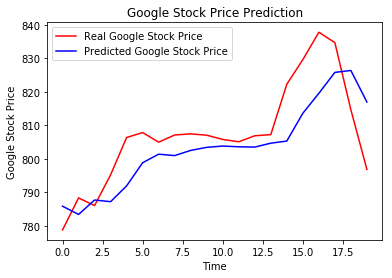

In [47]:
print(len(real_stock_price_20), len(predicted_stock_price_20))

# Visualising the results
plt.plot(real_stock_price_20[-20:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_20, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [48]:
#lets evaluate the performance of the model
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price_20[-20:], predicted_stock_price_20))
print("rmse is:",rmse)
performance = rmse/np.mean(real_stock_price_20[-20:])
print ("% Performance is:", performance)

rmse is: 10.10063953938525
% Performance is: 0.0125081291988


This is better than what we got with single time step.

<b> Model with - 60 timesteps & 1 LSTM layer </b>

We just need to call the aforementioned method just with the parameter time_step = 60.

In [49]:
real_stock_price_60, predicted_stock_price_60 = performMultipleTimeStepSingleLSTM(time_step = 60)

Epoch 1/100
1198/1198 [==============================] - 3s - loss: 0.0875     
Epoch 2/100
1198/1198 [==============================] - 1s - loss: 0.0660     
Epoch 3/100
1198/1198 [==============================] - 1s - loss: 0.0605     
Epoch 4/100
1198/1198 [==============================] - 1s - loss: 0.0552     
Epoch 5/100
1198/1198 [==============================] - 1s - loss: 0.0496     
Epoch 6/100
1198/1198 [==============================] - 1s - loss: 0.0434     
Epoch 7/100
1198/1198 [==============================] - 2s - loss: 0.0374     
Epoch 8/100
1198/1198 [==============================] - 2s - loss: 0.0312     
Epoch 9/100
1198/1198 [==============================] - 2s - loss: 0.0246     
Epoch 10/100
1198/1198 [==============================] - 2s - loss: 0.0181     
Epoch 11/100
1198/1198 [==============================] - 2s - loss: 0.0124     
Epoch 12/100
1198/1198 [==============================] - 2s - loss: 0.0076     
Epoch 13/100
1198/1198 [=============

1278 60


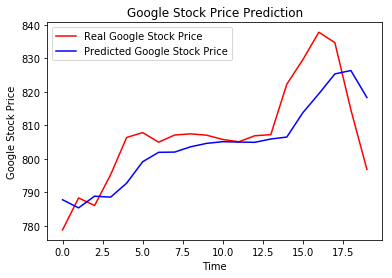

In [58]:
print(len(real_stock_price_60), len(predicted_stock_price_60))
# Visualising the results
plt.plot(real_stock_price_60[-20:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_60[-20:], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Plotting the 60 predictions.

1278 60


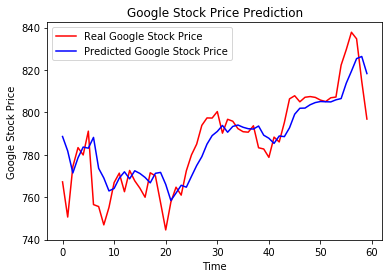

In [59]:
print(len(real_stock_price_60), len(predicted_stock_price_60))
# Visualising the results
plt.plot(real_stock_price_60[-60:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_60, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Model evaluation

In [60]:
#lets evaluate the performance of the model
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price_60[-60:], predicted_stock_price_60))
print("rmse is:",rmse)
performance = rmse/np.mean(real_stock_price_60[-60:])
print ("% Performance is:", performance)

rmse is: 11.109520255856117
% Performance is: 0.0141380150301


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def performMultipleTimeStepMultiLSTM(time_step):

    # Importing the training set
    training_set = pd.read_csv('Google_Stock_Price_Train.csv')
    training_set = training_set.iloc[:,1:2].values
    
    # Feature Scaling
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)

    X_train = []
    y_train = []
    # the X_train contains the data for previous 20 time steps (20 days)
    # the y_train contains the data for the label/data for the 21 time step
    for i in range(time_step, len(training_set_scaled)):
        #take the 20 time steps data as the training data
        # the second zero is to take the first dimension
        X_train.append(training_set_scaled[i-time_step:i, 0])
        # take the 21st time step data as the label
        y_train.append(training_set_scaled[i, 0])

    #now lets create a numpy array of the training data and the label
    X_train, y_train = np.array(X_train), np.array(y_train)

    #lets reshape the data to 3-D which is required by the model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Importing the Keras libraries and packages
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM

    # Initialising the RNN
    regressor = Sequential()

    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units = 3, input_shape = (None, 1), return_sequences=True))

    #Adding 2nd LSTM layer, we set everything as the previous LSTM layer
    regressor.add(LSTM(units = 3, return_sequences=True))  
    
    #Adding 3rd LSTM layer
    regressor.add(LSTM(units = 3, return_sequences=True)) 
    
    #Adding 4th LSTM layer
    regressor.add(LSTM(units = 3)) 
    
    
    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

    # Making the predictions and visualising the results

    # Getting the real stock price of 2017
    test_set = pd.read_csv('Google_Stock_Price_Test.csv')
    test_set = test_set.iloc[:,1:2].values

    #we convert the test data into the 20 time step format as X_train

    #lets concatenate the training set and test set to get the 20 time span data
    real_stock_price = np.concatenate((training_set[0:len(training_set)], test_set), axis = 0)

    #scaling the data
    real_stock_price_scaled = sc.transform(real_stock_price)

    inputs = []
    #the range is adjusted so that the time_step number of entries are included in the inputs
    for i in range(len(training_set) - time_step , len(training_set)):
        inputs.append(real_stock_price_scaled[i-time_step:i, 0])


    inputs = np.array(inputs)

    inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))


    predicted_stock_price = regressor.predict(inputs)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    return real_stock_price, predicted_stock_price

<b> Model with time step = 20 and 4 LSTM layers </b>

Lets invoke above method for time step = 20

In [85]:
real_stock_price_20, predicted_stock_price_20 = performMultipleTimeStepMultiLSTM(time_step = 20)

Epoch 1/100
1238/1238 [==============================] - 7s - loss: 0.2358     
Epoch 2/100
1238/1238 [==============================] - 2s - loss: 0.1089     
Epoch 3/100
1238/1238 [==============================] - 2s - loss: 0.0688     
Epoch 4/100
1238/1238 [==============================] - 2s - loss: 0.0423     
Epoch 5/100
1238/1238 [==============================] - 2s - loss: 0.0095     
Epoch 6/100
1238/1238 [==============================] - 2s - loss: 0.0036     
Epoch 7/100
1238/1238 [==============================] - 2s - loss: 0.0034     
Epoch 8/100
1238/1238 [==============================] - 2s - loss: 0.0032     
Epoch 9/100
1238/1238 [==============================] - 2s - loss: 0.0031     - ETA: 0s - los
Epoch 10/100
1238/1238 [==============================] - 2s - loss: 0.0030     
Epoch 11/100
1238/1238 [==============================] - 2s - loss: 0.0028     
Epoch 12/100
1238/1238 [==============================] - 2s - loss: 0.0026     
Epoch 13/100
1238/1238

1278 20


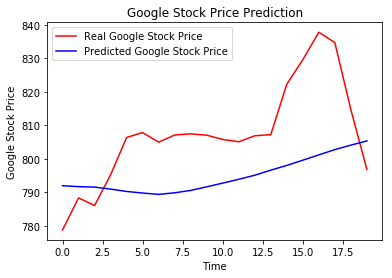

In [86]:
print(len(real_stock_price_20), len(predicted_stock_price_20))
# Visualising the results
plt.plot(real_stock_price_20[-20:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_20, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [87]:
#lets evaluate the performance of the model
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price_20[-20:], predicted_stock_price_20))
print("rmse is:",rmse)
performance = rmse/np.mean(real_stock_price_20[-20:])
print ("% Performance is:", performance)

rmse is: 17.97040488965232
% Performance is: 0.022253654854


<b> Model with time step = 60 and 4 LSTM layers </b>

We just call above method with parameter time_step = 60

In [5]:
real_stock_price_60, predicted_stock_price_60 = performMultipleTimeStepMultiLSTM(time_step = 60)

Epoch 1/100
1198/1198 [==============================] - 8s - loss: 0.1346     
Epoch 2/100
1198/1198 [==============================] - 4s - loss: 0.0374     
Epoch 3/100
1198/1198 [==============================] - 4s - loss: 0.0131     
Epoch 4/100
1198/1198 [==============================] - 5s - loss: 0.0069     
Epoch 5/100
1198/1198 [==============================] - 5s - loss: 0.0049     
Epoch 6/100
1198/1198 [==============================] - 5s - loss: 0.0046     
Epoch 7/100
1198/1198 [==============================] - 5s - loss: 0.0041     
Epoch 8/100
1198/1198 [==============================] - 5s - loss: 0.0037     
Epoch 9/100
1198/1198 [==============================] - 5s - loss: 0.0035     
Epoch 10/100
1198/1198 [==============================] - 5s - loss: 0.0033     
Epoch 11/100
1198/1198 [==============================] - 5s - loss: 0.0031     
Epoch 12/100
1198/1198 [==============================] - 5s - loss: 0.0030     
Epoch 13/100
1198/1198 [=============

1278 60


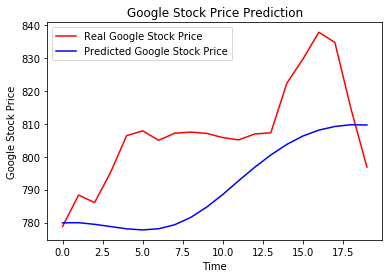

In [6]:
print(len(real_stock_price_60), len(predicted_stock_price_60))
# Visualising the results
plt.plot(real_stock_price_60[-20:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_60[-20:], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [7]:
#lets evaluate the performance of the model
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price_60[-60:], predicted_stock_price_60))
print("rmse is:",rmse)
performance = rmse/np.mean(real_stock_price_60[-60:])
print ("% Performance is:", performance)

rmse is: 28.913109899976707
% Performance is: 0.0367949265962


<b> Multiple Features </b>

The above RNNs just used a single feature (the stock price) for the prediction. Next, we try to play around with multiple features to make the prediction.

In [2]:
#def performMultipleTimeMultiFeatureSingleLSTM(time_step):

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

time_step = 20
# Importing the training set
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:,1:3].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

# Getting the inputs and the ouputs
X_train = training_set_scaled[0:1257]
y_train = training_set_scaled[1:1258]

# Reshaping
X_train = np.reshape(X_train, (1257, 1, 2))

#now lets create a numpy array of the training data and the label
X_train, y_train = np.array(X_train), np.array(y_train)


#lets reshape the data to 3-D which is required by the model
print(X_train.shape)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
#print(X_train.shape)

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 2), return_sequences=False))

#regressor.add(Dropout(.2))

# Adding the output layer
regressor.add(Dense(units = 2))


# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

(1257, 1, 2)
Epoch 1/100
1257/1257 [==============================] - 3s - loss: 0.5310     
Epoch 2/100
1257/1257 [==============================] - 0s - loss: 0.4113     
Epoch 3/100
1257/1257 [==============================] - 0s - loss: 0.3150     
Epoch 4/100
1257/1257 [==============================] - 0s - loss: 0.2384     
Epoch 5/100
1257/1257 [==============================] - 0s - loss: 0.1791     
Epoch 6/100
1257/1257 [==============================] - 0s - loss: 0.1364     
Epoch 7/100
1257/1257 [==============================] - 0s - loss: 0.1052     
Epoch 8/100
1257/1257 [==============================] - 0s - loss: 0.0823     
Epoch 9/100
1257/1257 [==============================] - 0s - loss: 0.0681     
Epoch 10/100
1257/1257 [==============================] - 0s - loss: 0.0602     
Epoch 11/100
1257/1257 [==============================] - 0s - loss: 0.0559     
Epoch 12/100
1257/1257 [==============================] - 0s - loss: 0.0527     
Epoch 13/100
1257/1257 [

1257/1257 [==============================] - 0s - loss: 2.0870e-04     
Epoch 99/100
1257/1257 [==============================] - 0s - loss: 2.0904e-04     
Epoch 100/100
1257/1257 [==============================] - 0s - loss: 2.1004e-04     


In [7]:

# Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:3].values

# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 2))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(real_stock_price)
print(predicted_stock_price)

[[ 778.81  789.63]
 [ 788.36  791.34]
 [ 786.08  794.48]
 [ 795.26  807.9 ]
 [ 806.4   809.97]
 [ 807.86  809.13]
 [ 805.    808.15]
 [ 807.14  807.39]
 [ 807.48  811.22]
 [ 807.08  807.14]
 [ 805.81  806.21]
 [ 805.12  809.48]
 [ 806.91  806.91]
 [ 807.25  820.87]
 [ 822.3   825.9 ]
 [ 829.62  835.77]
 [ 837.81  838.  ]
 [ 834.71  841.95]
 [ 814.66  815.84]
 [ 796.86  801.25]]
[[ 776.50030518  782.33984375]
 [ 781.02886963  786.82550049]
 [ 782.01776123  787.68389893]
 [ 793.23028564  798.38122559]
 [ 797.75585938  802.25128174]
 [ 797.72686768  802.23944092]
 [ 796.51037598  801.25689697]
 [ 796.69659424  801.42022705]
 [ 798.64154053  802.95892334]
 [ 796.55987549  801.31170654]
 [ 795.77941895  800.68554688]
 [ 797.18652344  801.79187012]
 [ 796.4041748   801.1875    ]
 [ 802.88409424  805.75793457]
 [ 808.03594971  808.23944092]
 [ 813.42810059  810.7177124 ]
 [ 816.01141357  811.96557617]
 [ 816.90197754  812.31640625]
 [ 802.48498535  805.6809082 ]
 [ 789.9440918   795.36737061]

<b> Visualizing result </b>

As the prediction consists of two columns, we just use one column at a time to see the predicted output.

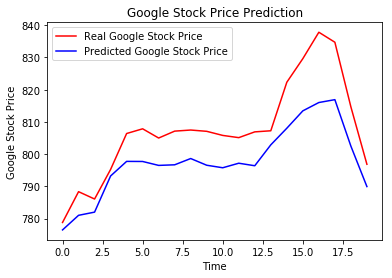

In [8]:
# Visualising the results
import matplotlib.pyplot as plot
plt.plot(real_stock_price[:,0], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:,0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

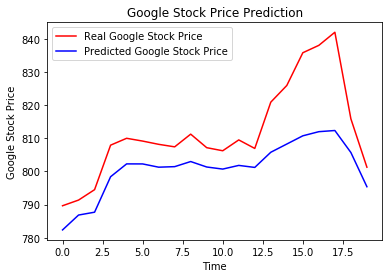

In [9]:
plt.plot(real_stock_price[:,1], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:,1], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<b> Evaluation </b>

In [10]:
#lets evaluate the performance of the model
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price[:,0], predicted_stock_price[:,0]))
print("rmse is:",rmse)
performance = rmse/np.mean(real_stock_price[:,0])
print ("% Performance is:", performance)

rmse is: 10.895009620445972
% Performance is: 0.0134918375637


In [11]:
rmse = math.sqrt(mean_squared_error(real_stock_price[:,1], predicted_stock_price[:,1]))
print("rmse is:",rmse)
performance = rmse/np.mean(real_stock_price[:,1])
print ("% Performance is:", performance)

rmse is: 13.203714432606885
% Performance is: 0.0162622040697
